## 1. Dimensional reduction with PCA: PCA를 통한 차원축소

- 주성분을 새로운 변수로 삼아 모델링하는것도 방법이지만 차원축소가 가장 대표적인 활용방법
- 분산이 큰 방향은 놔두고 작은방향은 버린다 = 큰거만 유지하고 작은건 버린다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, NMF
import os
%matplotlib inline

### 1.1. Read in data and explore:

In [2]:
os.chdir(r'C:\Users\Gram\Desktop\myPyCode\04 머신러닝 - 실습\data')               

In [3]:
df = pd.read_csv('data_number_nine.csv', header='infer')

In [4]:
df.shape

(23, 23)

In [5]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.006,0.006,0.006,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.006,0.006
1,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.005,0.005
2,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.7854,0.7776,0.3738,0.1486,0.0050,0.0050,0.0050,0.005,0.005,0.005
3,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.1797,0.5951,...,0.9911,0.9911,0.9911,0.9756,0.8242,0.5912,0.0283,0.005,0.005,0.005
4,0.005,0.005,0.005,0.005,0.005,0.005,0.1836,0.599,0.9368,0.9911,...,0.5214,0.6099,0.7815,0.9911,0.8941,0.8785,0.4088,0.005,0.005,0.005


### 1.2. Visualize the data:

In [6]:
def ShowMe(X):
    Y= 1.0 - X
    plt.imshow(Y, cmap='gray')  #imshow로 적합한 시각화 함수 정의
    plt.show()                  #전체 데이터 세트를 한 번에 픽셀 이미지로 시각화

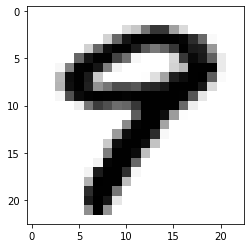

In [7]:
X = np.array(df)
ShowMe(X)         #showme로 시각화 => 흐릿하고 잘 안보임

### 1.3. Visualize the reduced dimensional input by PCA: PCA에 의해 축소된 차원을 시각화

차원축소 방법

- 원래 좌표축인 x1,x2를 좌표축으로하는 원래 그래프에 시각화
- 주성분을 구해 주성분 축(PC1,PC2)을 새로운 좌표축으로 삼아 좌표를 나타냄 Transformed scores
- 원래좌표들은 PC1,PC2를 새로운 좌표축으로 삼아 로테이션해서 이동함<br><br>

- 변동(분산)이 상대적으로 작은 방향인 PC2를 제거 (가로축이 분산 제일크고 그다음 세로축)<br><br>

- PC2를 지웠더니 붕 떠있던 것이 땅바닥에 붙는 효과나타남(이건 주성분공간)<br><br>

- 이걸 다시 공간이동해서 X1,X2로 돌아옴
- 원래 펴져있던 관측치들이 일직선으로 좁혀짐 reduced dimensional input을 볼 수 있게 됨<br><br>

=>가장 분명한 패턴(추세)만 남고(제일 큰 추세만 가져가겠다는 뜻), 디테일은 손상됨

In [8]:
#주성분 차원축소해서 시각화
def reducedInputPCA(X,nPC):                                 # 차원 축소해주는 함수 만듬
    pca = PCA(n_components = nPC)                           # PCA 객체 정의, 차원 수
    X_pca = pca.fit_transform(X)                            # PCi 축으로 변환을 하고 차원을 축소


    return pca.inverse_transform(X_pca)                     # inverse_transform해서 원래 축 x1,x2 그래프로 돌아옴

N# of PCs = 23


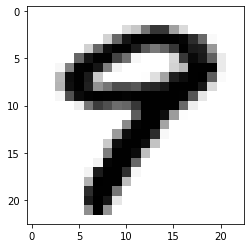

N# of PCs = 10


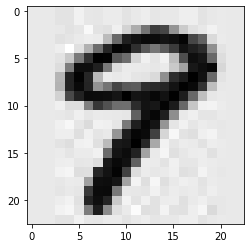

N# of PCs = 5


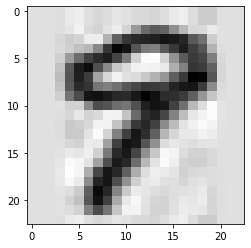

N# of PCs = 3


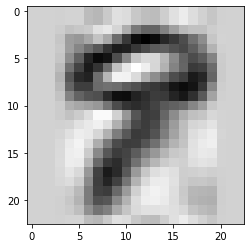

N# of PCs = 1


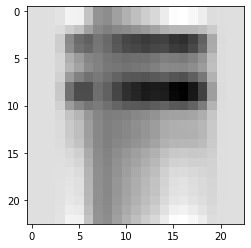

In [9]:
# 숫자바꿔가면서 축소된 차원을 시각화
for nPC in [23, 10, 5, 3, 1]:          #23,10,5,3,1 숫자를 줄일수록 더 흐릿해짐
    Z = reducedInputPCA(X,nPC)
    print( "N# of PCs = " + str(nPC))
    ShowMe(Z)
    

### 1.4. Analysis of the cumulative variance ratio (CVR): 누적분산비율

CVR이란? 차원축소의 비율을 계산하는 것

분산의 누적합을 구해 전체 움직임 중 어느정도를 분산으로 나타내고 있는지 봄<br><br>

- 누적분산을 나누면 비율이 되고 이게 1로 가야함
- 이 중 90프로만 킵하겠다라는 타겟정하기
- 타겟에 맞는 정도의 주성분만 킵하고 나머지는 버림<br><br>

- PC1,PC2에는 방향이 있고, 방향에 따른 분산을 계산함
- 이 분산들은 큰거에서 작은거 순으로 정렬되어있음
- 여기서 분산은 패턴<br><br>

- 변동이 있는 변수를 찾는 것이 목적 
- 변동이 많은 것부터 선호하므로 변동이 큰거부터 정렬<br><br>

- 새롭게 변환된 PC1,PC2는 서로 독립적인 방향이라 상관성에 자유로움 (비독립적이면 공분산이 존재함)
- 독립적이기 때문에 총 분산을 개개분산의 합으로 나타낼 수 있음<br><br>


즉, 전체는 50차원이고 이걸 1로 둘 때,10개의 분산을 합했을 때 비율적으로 어느정도냐 (전체가 1인데 그중에 몇 프로가 포함되어있냐)

시그마 1,2~ 계속 더해 1로 가면 첫번째가 올라가는 폭이 젤 큼 => 분산이 다 똑같지 않다는 뜻<br>
뒤로 갈수록 올라가는 폭이 점점 작아진다 => 분산의 기여도가 줄어든다는 뜻<br><br>

따라서 CVR 목표치에 해당하는 만큼의 주성분을 유지해야 한다

In [10]:
#pca객체 생성해 fit(x)로 주성분 만듬
pca = PCA(n_components = 23)                          # PCA객체 정의
pca.fit(X)                                            # 데이터 학습


PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

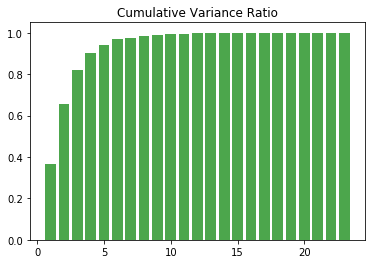

In [11]:
# CVR을 Barplot으로 시각화
CVRs = np.cumsum(pca.explained_variance_ratio_) #CVR계산-23개 주성분 만들어 explained_variance_ratio_가져오고 그것을 cumsum으로 누적
                                                #기여도 가져온 것을 누적시켜 시각화
nPCs = np.arange(23)+1                          # PCs의 개수와 동일한 array 생성

plt.bar(nPCs,CVRs,color = 'green', alpha=0.7)  
plt.title('Cumulative Variance Ratio')
plt.show()



#23개 주성분 만들어 explained_variance_ratio_ 가져오고 그것을 cumsum으로 누적
#기여도를 가져온 거 누적시켜 시각화

#23개의 주성분 누적되어 전체 100프로 중에 어느정도 설명하는지 보여줌
#몇개를 줄여도 하락폭은 거의 없다 = 분산의 감소가 거의 없다

#23에서 5까지 줄이면 하락폭 비슷하지만 5이하로 줄이면 하락폭이 커짐 

#첫번째가 올라가는 폭이 젤 큼(분산이 다 똑같지 않다는 뜻)
#뒤로 갈수록 올라가는 폭이 점점 작아진다(분산의 기여도가 줄어든다는 뜻)

#차원축소-분산이 큰 방향은 놔두고 작은방향은 버린다(큰거만 유지하고 작은건 버린다)

## 2. Optimized high dimensional visualization with PCA: PCA로 고차원 시각화

### 2.1. Simulate data: 데이터 시뮬레이션

In [12]:
#8차원에서 3개로 군집
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 5, random_state=123)  #150개 관측치, 변수 8개, 군집수 3개
X.shape         

(150, 8)

In [13]:
#컬러링
myColors = {0:'red',1:'green',2:'blue'}  
labelColors = pd.Series(label).apply(lambda x: myColors[x])


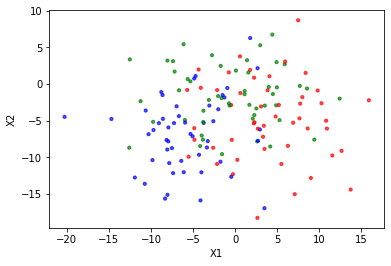

In [14]:
#X1은 칼럼0, X2는 칼럼1로 시각화 
plt.scatter(X[:,0],X[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

#클러스터끼리 겹칩

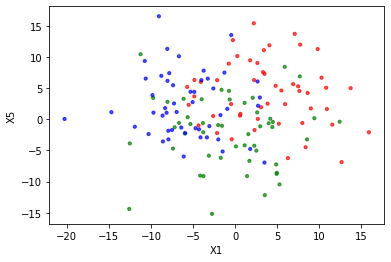

In [15]:
#X1은 칼럼0, X5는 칼럼4로 시각화 
plt.scatter(X[:,0],X[:,4],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X1")
plt.ylabel("X5")
plt.show()

#겹쳐보임

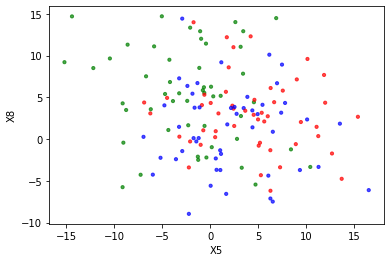

In [16]:
#X5은 칼럼4, X8는 칼럼7로 시각화 
plt.scatter(X[:,4],X[:,7],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("X5")
plt.ylabel("X8")
plt.show()

#겹쳐보임

### 2.2. Visualize on the plane defined by PC1 and PC2: PC1 및 PC2에 의해 정의된 평면에서 시각화
### 고차원을 2차원에 투영

주성분가지고 할 수 있는 고차원 시각화

- 고차원이라 하면 변수가 여러개 있는 것 (4차원이상)
- 고차원을 2차원으로 우리가 볼 수있게 투영해야 함 <br><br>

- 방향의 각도를 잘 정해서 투영받아야 함(얼짱각도를 찾아야)
- 얼짱각도는 가로세로 잘 퍼져있는 각도<br><br>

- 이 방향은 PC1,PC2 분산이 제일 큰 방향
- PC1,PC2 방향으로 공간이동을 할 때 이미 변환이 되어있음<br><br>

- PC1,PC2의 방향으로 공간이동된 좌표를 그대로 가져다가 가로세로로 시각화<br><br>

- 시각화할 때 어떤 좌표가 어떤 군집에 해당하는지 컬러를 줘야 함

In [18]:
# 처음 2개 PC만 필요
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

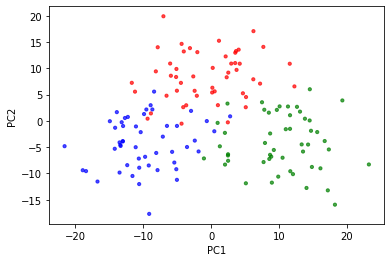

In [19]:
# PC1, PC2 평면에서 시각화 
plt.scatter(X_pca[:,0],X_pca[:,1],marker="o",alpha=0.7, s=10, c=labelColors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#PC1(0이라는 인덱스)과 PC2(1이라는 인덱스)를 사용  

#원래 좌표축 x1,x2 사용하니 뭉쳐져 있다가 이제는 펼쳐져 알아볼 수 있게 됨
#원래 좌표를 유지하면서 할 수 있는 최적의 시각화임

x1,x2 원래변수를 찾아도 얼짱각도 안나왔는데 PC1,PC2로 하니까 잘 나옴

차원이 8차원이든 모든 똑같이 적용가능

하지만 클러스터 개수가 너무 많으면 이 방법도 못씀

차원 수와는 무관하지만 클러스터가 많으면 오버랩됨

다른방법을 써야함(복잡)